In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

### 1. Data Collection

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Data Analysis

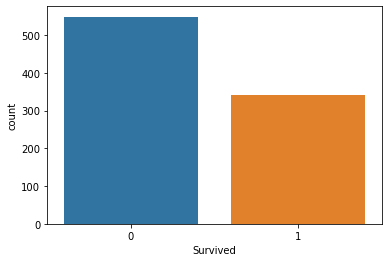

In [10]:
sns.countplot(x='Survived', data = titanic)

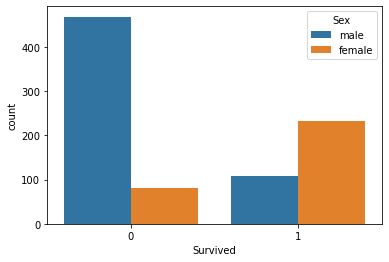

In [11]:
sns.countplot(x='Survived', hue='Sex', data = titanic)

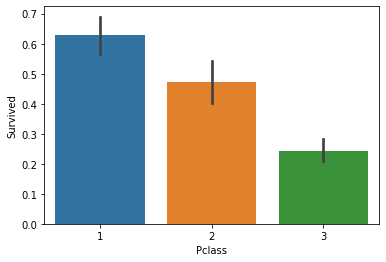

In [12]:
sns.barplot(x='Pclass', y='Survived', data = titanic)

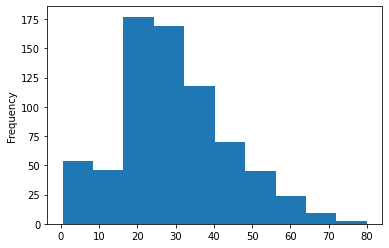

In [13]:
titanic['Age'].plot.hist()

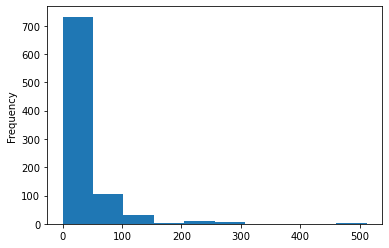

In [14]:
titanic['Fare'].plot.hist()

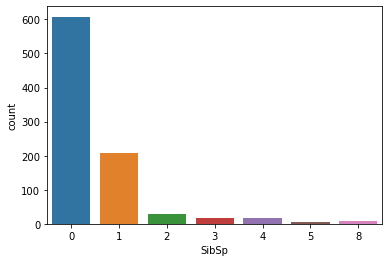

In [15]:
sns.countplot(x='SibSp', data = titanic)

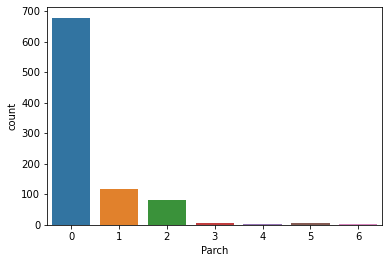

In [16]:
sns.countplot(x='Parch', data = titanic)

### 3. Data Wrangling

In [17]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

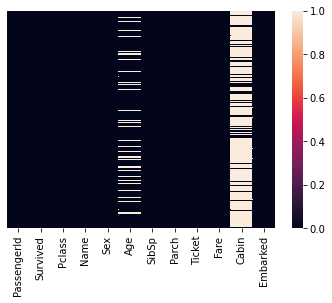

In [19]:
sns.heatmap(titanic.isnull(), yticklabels=False)

Dealing with NaN Datas

In [20]:
titanic['Embarked'].fillna((titanic['Embarked'].mode()), inplace=True)

In [21]:
titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)

In [23]:
titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [24]:
titanic.drop('Cabin', axis=1, inplace=True) #Cabin has 687 Nan

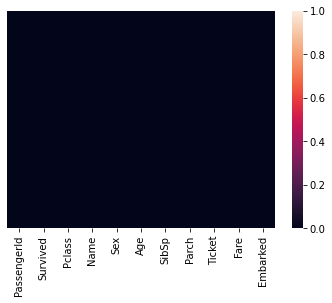

In [25]:
sns.heatmap(titanic.isnull(), yticklabels=False)

Strings to integers with Dummies

In [28]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)

In [29]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [30]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)

In [31]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [33]:
titanic_concat = pd.concat([titanic, sex, embark], axis=1)

In [34]:
titanic_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,0


In [35]:
titanic_concat.drop(['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [36]:
titanic_concat

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


### 4. Train and test Data

Logistic Regression

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 


In [249]:
titanic_lrm = LogisticRegression()

In [250]:
X=titanic_concat.drop(['Survived'], axis=1)
y=titanic_concat['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
titanic_lrm.fit(X_train, y_train)
titanic_lrm.predict(X_train)
titanic_lrm.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [251]:
titanic_lrm_score = titanic_lrm.score(X_train, y_train), titanic_lrm.score(X_test,y_test)
titanic_lrm_score

(0.8023952095808383, 0.7982062780269058)

In [252]:
titanic_lrm.score(X,y) 

0.8013468013468014

Evaluating Classifiers

In [253]:
from sklearn.metrics import precision_score, recall_score


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC


In [255]:
y_prediction = titanic_lrm.predict(X) #generating predictive results
accuracy_score(y_prediction, y) #compare predictive results to actual results

0.8013468013468014

In [256]:
#precision recall

print(precision_score(y_prediction, y), recall_score(y_prediction, y))

0.7076023391812866 0.7586206896551724


Confusion Matrix

In [257]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [258]:
titanic_conmat = confusion_matrix(y_prediction, y)
titanic_conmat

array([[472, 100],
       [ 77, 242]], dtype=int64)

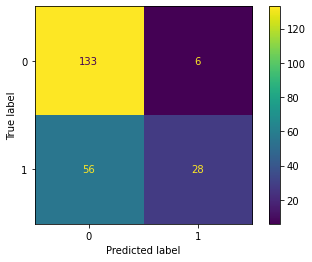

In [263]:
#plot_confusion_matrix(clf, y_prediction, y, normalize=None)  ?????

X=titanic_concat.drop(['Survived'], axis=1)   # X= y_prediction
y=titanic_concat['Survived']                  # y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
X=titanic_concat.drop(['Survived'], axis=1)
y=titanic_concat['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Receiver Operator Curve (ROC) and Area Under the Curve (AUC)

In [264]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve

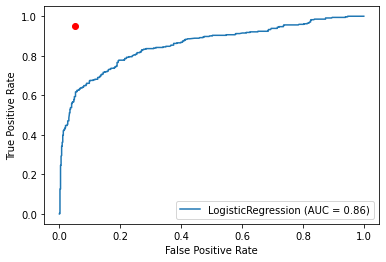

In [265]:
plot_roc_curve(titanic_lrm, X, y)   
plt.plot(0.05, 0.95,'ro')

In [269]:
# np.argmax(tpr - fpr) returns the index of the maximum value of
# tpr - fpr
# threshold[np.argmax(tpr - fpr)]

In [270]:
# print(threshold[np.argmax(tpr - fpr)],\
 #     fpr[np.argmax(tpr - fpr)],\
#     tpr[np.argmax(tpr - fpr)])

In [271]:
# Calculating area under the curve > 0.7 acceptable. Better > 0.8

# auc_score = auc(fpr, tpr)
# print("Area under the curve = ",auc_score)


Decision Tree

In [272]:
from sklearn.tree import DecisionTreeClassifier


In [273]:
titanic_dtm = DecisionTreeClassifier()

In [274]:
titanic_concat

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [275]:
X = titanic_concat[['Pclass', 'Age', 'male']]
y = titanic_concat['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 100)
titanic_dtm.fit(x_train, y_train)
titanic_dtm.predict(x_train)
titanic_dtm.predict(x_test)
titanic_dtm.score(x_train, y_train), titanic_dtm.score(x_test,y_test)

(0.8892215568862275, 0.7982062780269058)

In [276]:
titanic_dtm_score = titanic_dtm.score(x_train, y_train), titanic_dtm.score(x_test,y_test)
titanic_dtm_score

(0.8892215568862275, 0.7982062780269058)

Random forest

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [278]:
X = titanic_concat[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = titanic_concat['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 100)

In [279]:
titanic_rf = RandomForestClassifier(random_state = 250)
titanic_rf.fit(x_train,y_train)
y_pred = titanic_rf.predict(x_test)

In [280]:
titanic_rf_score = titanic_rf.score(x_train,y_train), titanic_rf.score(x_test,y_test)
titanic_rf_score

(0.9865269461077845, 0.820627802690583)

### 5. Accuracy Comparison

In [281]:
titanic_lrm_score

(0.8023952095808383, 0.7982062780269058)

In [282]:
titanic_dtm_score

(0.8892215568862275, 0.7982062780269058)

In [283]:
titanic_rf_score

(0.9865269461077845, 0.820627802690583)